In [17]:
import pandas as pd
import numpy  as np
import shap
import pickle

In [18]:
# %load load_list_var.py
def load_vars(type):

    if type == "numerical":

        vars = []
        with open("Data/num_var.txt", "r") as f:
            for line in f:
                vars.append(str(line.strip()))

    elif type == "categorical":

        vars = []
        with open("Data/cat_var.txt", "r") as f:
            for line in f:
                vars.append(str(line.strip()))

    else:

        print("Not properly loaded var, type is {}".format(type))

    return vars


In [19]:
variables = [*load_vars('numerical'), *load_vars('categorical')]
variables.remove('CODE_GENDER')
variables.remove('EXT_SOURCE_1')
variables.remove('EXT_SOURCE_2')
variables.remove('EXT_SOURCE_3')

test_names = ['Output_preprocessing/Testing_set_woe_cat.csv.gz',
              'Output_xgboost_unrestricted/Testing_unrestricted_woe_6.csv.gz',
              'Output_xgboost_binning/Testing_with_woe_on_numerical_6.csv.gz',
              'Output_xgboost_ex_ante_binning/Testing_XGB_ex_woe_6.csv.gz']

names    = ['original',
            'unrestricted_6',
            'best_6',
            'ex_ante_6']

In [48]:
name     = 'best_6'
filename = 'Output_final_models/{}.sav'.format(name)

In [54]:
data = pd.read_csv('Output_xgboost_binning/Training_with_woe_on_numerical_6.csv.gz', compression='gzip')
data = data[variables]

In [55]:
loaded_model = pickle.load(open(filename, 'rb'))

In [56]:
XGB_kernel_explainer = shap.TreeExplainer(loaded_model)

In [57]:
shap_values = XGB_kernel_explainer.shap_values(data)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


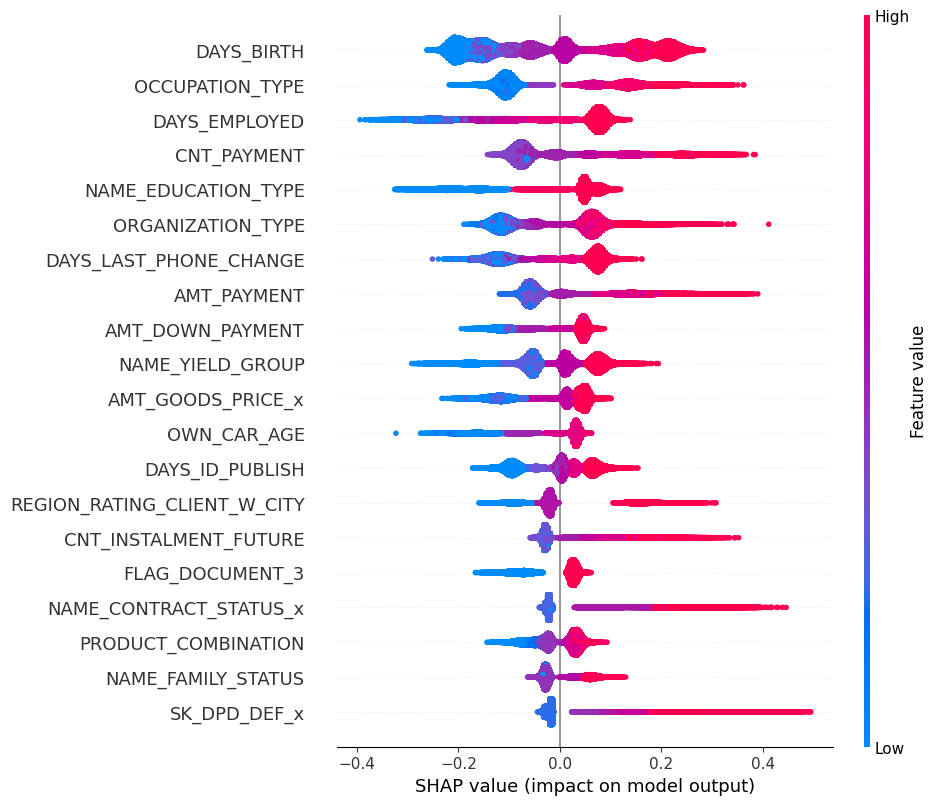

In [58]:
shap.summary_plot(shap_values,data)

In [26]:
name     = 'unrestricted_6'
filename = 'Output_final_models/{}.sav'.format(name)

In [27]:
data = pd.read_csv('Output_xgboost_binning/Tr.csv.gz', compression='gzip')
data = data[variables]

In [28]:
loaded_model = pickle.load(open(filename, 'rb'))

In [29]:
XGB_kernel_explainer = shap.TreeExplainer(loaded_model)

In [30]:
shap_values = XGB_kernel_explainer.shap_values(data)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


ValueError: This reshape error is often caused by passing a bad data matrix to SHAP. See https://github.com/slundberg/shap/issues/580

In [31]:
shap.summary_plot(shap_values,data)